<a href="https://colab.research.google.com/github/anluchen98/TFG_Anlu_Chen/blob/main/Modelo2D_CNN_derivadas_topologicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import time as time

In [3]:
training_data=np.loadtxt('/content/drive/My Drive/train_experiments7.1.csv', delimiter=';')
training_solutions=np.loadtxt('/content/drive/My Drive/train_solutions7.1.csv',delimiter=';')
test_data=np.loadtxt('/content/drive/My Drive/test_experiments7.1.csv',delimiter=';')
test_solutions=np.loadtxt('/content/drive/My Drive/test_solutions7.1.csv',delimiter=';')

In [4]:
#training_data=np.reshape(training_data,(training_data.shape[0],15,1001))#usarlo en caso de modelo simple sin CNN.
training_data=np.reshape(training_data,(training_data.shape[0],15,1001,1))
print(training_data.shape)
#test_data=np.reshape(test_data,(test_data.shape[0],15,1001))#usarlo en caso de modelo simple sin CNN.
test_data=np.reshape(test_data,(test_data.shape[0],15,1001,1))
print(test_data.shape)

(5600, 15, 1001, 1)
(840, 15, 1001, 1)


Epoch 1/100
175/175 [==============================] - 5s 31ms/step - loss: 0.0241 - accuracy: 0.0000e+00 - val_loss: 0.0132 - val_accuracy: 0.0000e+00
Epoch 2/100
175/175 [==============================] - 5s 28ms/step - loss: 0.0084 - accuracy: 0.0000e+00 - val_loss: 0.0071 - val_accuracy: 0.0000e+00
Epoch 3/100
175/175 [==============================] - 5s 28ms/step - loss: 0.0061 - accuracy: 0.0000e+00 - val_loss: 0.0064 - val_accuracy: 0.0000e+00
Epoch 4/100
175/175 [==============================] - 5s 28ms/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 5/100
175/175 [==============================] - 5s 28ms/step - loss: 0.0056 - accuracy: 0.0000e+00 - val_loss: 0.0059 - val_accuracy: 0.0000e+00
Epoch 6/100
175/175 [==============================] - 5s 28ms/step - loss: 0.0054 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 7/100
175/175 [==============================] - 5s 29ms/step - loss: 0.0052 - acc

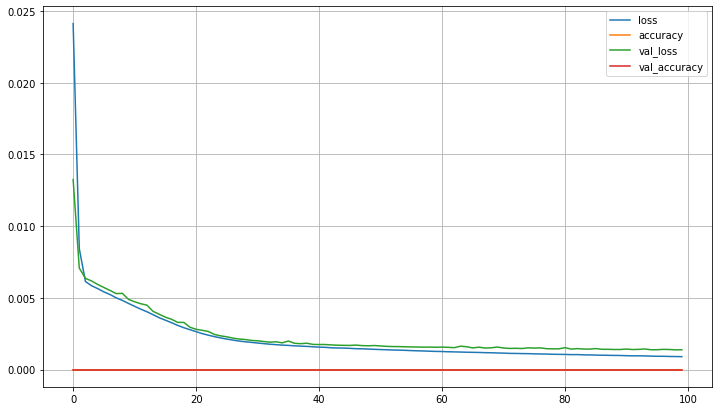

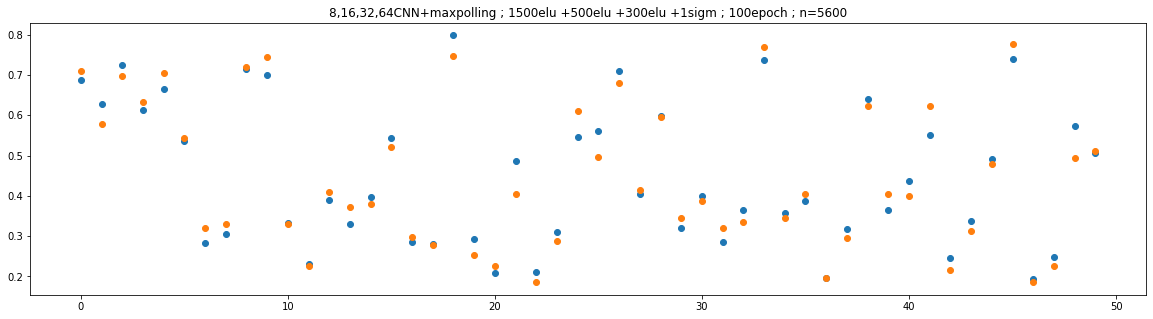

[0.68674135 0.62783295 0.72413647 0.61332834 0.66411239 0.53483814
 0.28406966 0.30638987 0.71353376 0.69962037 0.33157399 0.22986521
 0.38924009 0.32940951 0.39795548 0.54279882 0.28539467 0.28017321
 0.7980836  0.29221326 0.20976311 0.48737729 0.21095376 0.31076071
 0.54706484 0.56076509 0.71005523 0.4052124  0.59711236 0.31954244
 0.40059507 0.28630206 0.36536053 0.73770875 0.35702023 0.38751462
 0.19630244 0.31899863 0.64075059 0.36377773 0.43790093 0.5521313
 0.24675785 0.33833507 0.49211505 0.73937297 0.19403455 0.24859528
 0.57404327 0.50563949]
[0.709334 0.578501 0.698357 0.631922 0.705497 0.543755 0.319627 0.329727
 0.719029 0.744229 0.330817 0.226868 0.410542 0.372168 0.380425 0.521013
 0.298345 0.277534 0.746149 0.252901 0.226868 0.403494 0.187532 0.287866
 0.610284 0.495957 0.678725 0.414705 0.59552  0.344577 0.386935 0.319627
 0.3357   0.768596 0.343866 0.403494 0.196334 0.29589  0.621646 0.405532
 0.398817 0.621646 0.217174 0.312897 0.480205 0.777493 0.185208 0.226868
 0.

In [13]:
# GRADED FUNCTION: train_mnist_conv
tic=time.time()
def train_conv():

    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(32, (2,2), activation='relu',input_shape=(15,1001,1)),
            tf.keras.layers.MaxPooling2D(2,2),
            #tf.keras.layers.Conv2D(16, (2,2), activation='relu'),
            #tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),
            tf.keras.layers.Flatten(),#input_shape=(15,1001)),#usarlo en caso de modelo simple sin CNN.
            tf.keras.layers.Dense(1500, activation="elu"),
            tf.keras.layers.Dense(500, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(600, activation="elu"),
            #tf.keras.layers.Dense(100, activation="elu"),
            #tf.keras.layers.Dense(100, activation="elu"),
            #tf.keras.layers.Dense(100, activation="elu"),
            #tf.keras.layers.Dense(100, activation="elu"),
            #tf.keras.layers.Dense(100, activation="elu"),
            tf.keras.layers.Dense(300, activation="elu"),
            tf.keras.layers.Dense(1, activation="sigmoid")
            ])

    model.compile(optimizer='sgd', loss='MeanSquaredError', metrics=['accuracy'])
    # model fitting
    history = model.fit(training_data, training_solutions, validation_data=(test_data, test_solutions),epochs=100)
    
    # model plotting
    model.summary() 
    import pandas as pd
    import matplotlib.pyplot as plt
    pd.DataFrame(history.history).plot(figsize=(12,7))
    plt.grid(True)
    plt.show()

    #hacemos las predicciones y las guardamos
    predictions = model.predict(test_data)
    #Guardamos las predicciones si queremos para posteriores graficas
    #np.savetxt(predictionsfile, predictions, delimiter='\n')
    #También guardamos las soluciones, para poder graficar y ver visualmente la exactitud
    #np.savetxt(solutionsfile, test_solutions, delimiter='\n')
    x=np.zeros(50)
    y=np.zeros(50)
    z=np.zeros(50)
    for i in range (0,50):
      x[i]=i
    for i in range (0,50):
      y[i]=predictions[i]
    for i in range (0,50):
      z[i]=test_solutions[i]
    fig, ax = plt.subplots(figsize = (20, 5))
    plt.title("8,16,32,64CNN+maxpolling ; 1500elu +500elu +300elu +1sigm ; 100epoch ; n=5600") #cambiar el titulo de la grafica en cada caso.
    plt.scatter(x,y)
    plt.scatter(x,z)
    plt.show()
    print(y)
    print(z)

train_conv()  
toc=time.time()
print((toc-tic)/60,'\n minutos ha durado')